<a href="https://colab.research.google.com/github/hema082004/dr2024/blob/master/dlexp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4958 - loss: 429.7374 - val_accuracy: 0.5024 - val_loss: 6.4368
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5014 - loss: 25.5138 - val_accuracy: 0.4994 - val_loss: 0.7338
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4986 - loss: 3.5358 - val_accuracy: 0.5026 - val_loss: 0.7133
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4923 - loss: 1.9977 - val_accuracy: 0.5013 - val_loss: 0.7175
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4985 - loss: 1.3254 - val_accuracy: 0.4988 - val_loss: 0.7051
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4959 - loss: 1.1853 - val_accuracy: 0.4984 - val_loss: 0.6974
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5059 - loss: 0.9672 - val_accuracy: 0.5007 - val_loss: 0.6962
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5039 - loss: 0.9064 - val_accuracy:

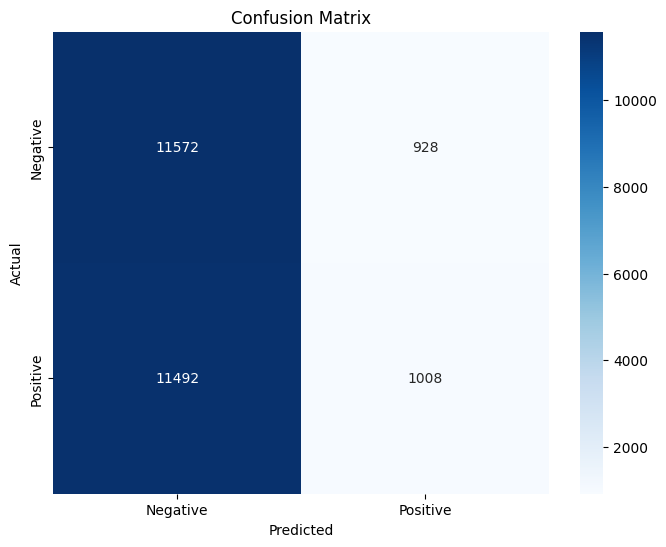

In [2]:
# Import necessary libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
# Preprocess the data
maxlen = 200
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)
# Evaluate the model on test data
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
from sklearn.metrics import classification_report
# Predict class labels for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate and print classification report
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"],
yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()